# 4. EDA und Regression Diagnostic

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from patsy import dmatrices
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [6]:
df = pd.read_csv('/Users/cenkyagkan/books/mynewbook/content/mobile_clean_data.csv')

In [7]:
df

,carname,price,milage,hubraum,fuel_type,transmission,num_seats,num_doors,emission_class,car_type,num_owners,Model,power_ps,power_kw,age
0,Mercedes-Benz Sprinter II Kasten 214 CDI Klima...,16950.0,198245.0,2.143,Diesel,Schaltgetriebe,3,4/5,Euro6,van,1,Sprinter,143.0,105.0,4.246667
1,Mercedes-Benz GLB 220 d 4M Progressive AHK Dis...,60490.0,10529.0,1.950,Diesel,Automatik,5,4/5,Euro6d,suv,1,GLB,190.0,140.0,1.413333
2,Mercedes-Benz A 200 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,Benzin,Automatik,5,4/5,Euro6d,limousine,1,A-Klasse,136.0,100.0,2.496667
3,Mercedes-Benz C 180 *CABRIO*AMG LINE*9G*2.HAND...,31990.0,84925.0,1.595,Benzin,Automatik,4,2/3,Euro6,cabrio,2,C-Klasse,156.0,115.0,4.746667
4,Mercedes-Benz A 180 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,Benzin,Automatik,5,4/5,Euro6d,limousine,1,A-Klasse,136.0,100.0,2.496667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Mercedes-Benz GLE 63 S 4M Coupe,53999.0,74500.0,2.143,Diesel,Automatik,7,4/5,Euro6,van,2,S-Klasse,190.0,140.0,3.996667
896,Mercedes-Benz GLE 350 d Cp Orange Edition AMG ...,54500.0,44518.0,2.925,Diesel,Automatik,5,4/5,Euro6,limousine,1,GLE,286.0,210.0,2.996667
897,Mercedes-Benz GLE 350d 4M Coupe AMG Pano AHK,39440.0,33975.0,1.950,Diesel,Automatik,5,4/5,Euro6d,kombi,3,GLE,194.0,143.0,2.246667
898,Mercedes-Benz S 560 4MATIC Limousine lang AMG ...,36000.0,96500.0,2.987,Diesel,Automatik,5,4/5,Euro6,kombi,2,S-Klasse,258.0,190.0,3.913333


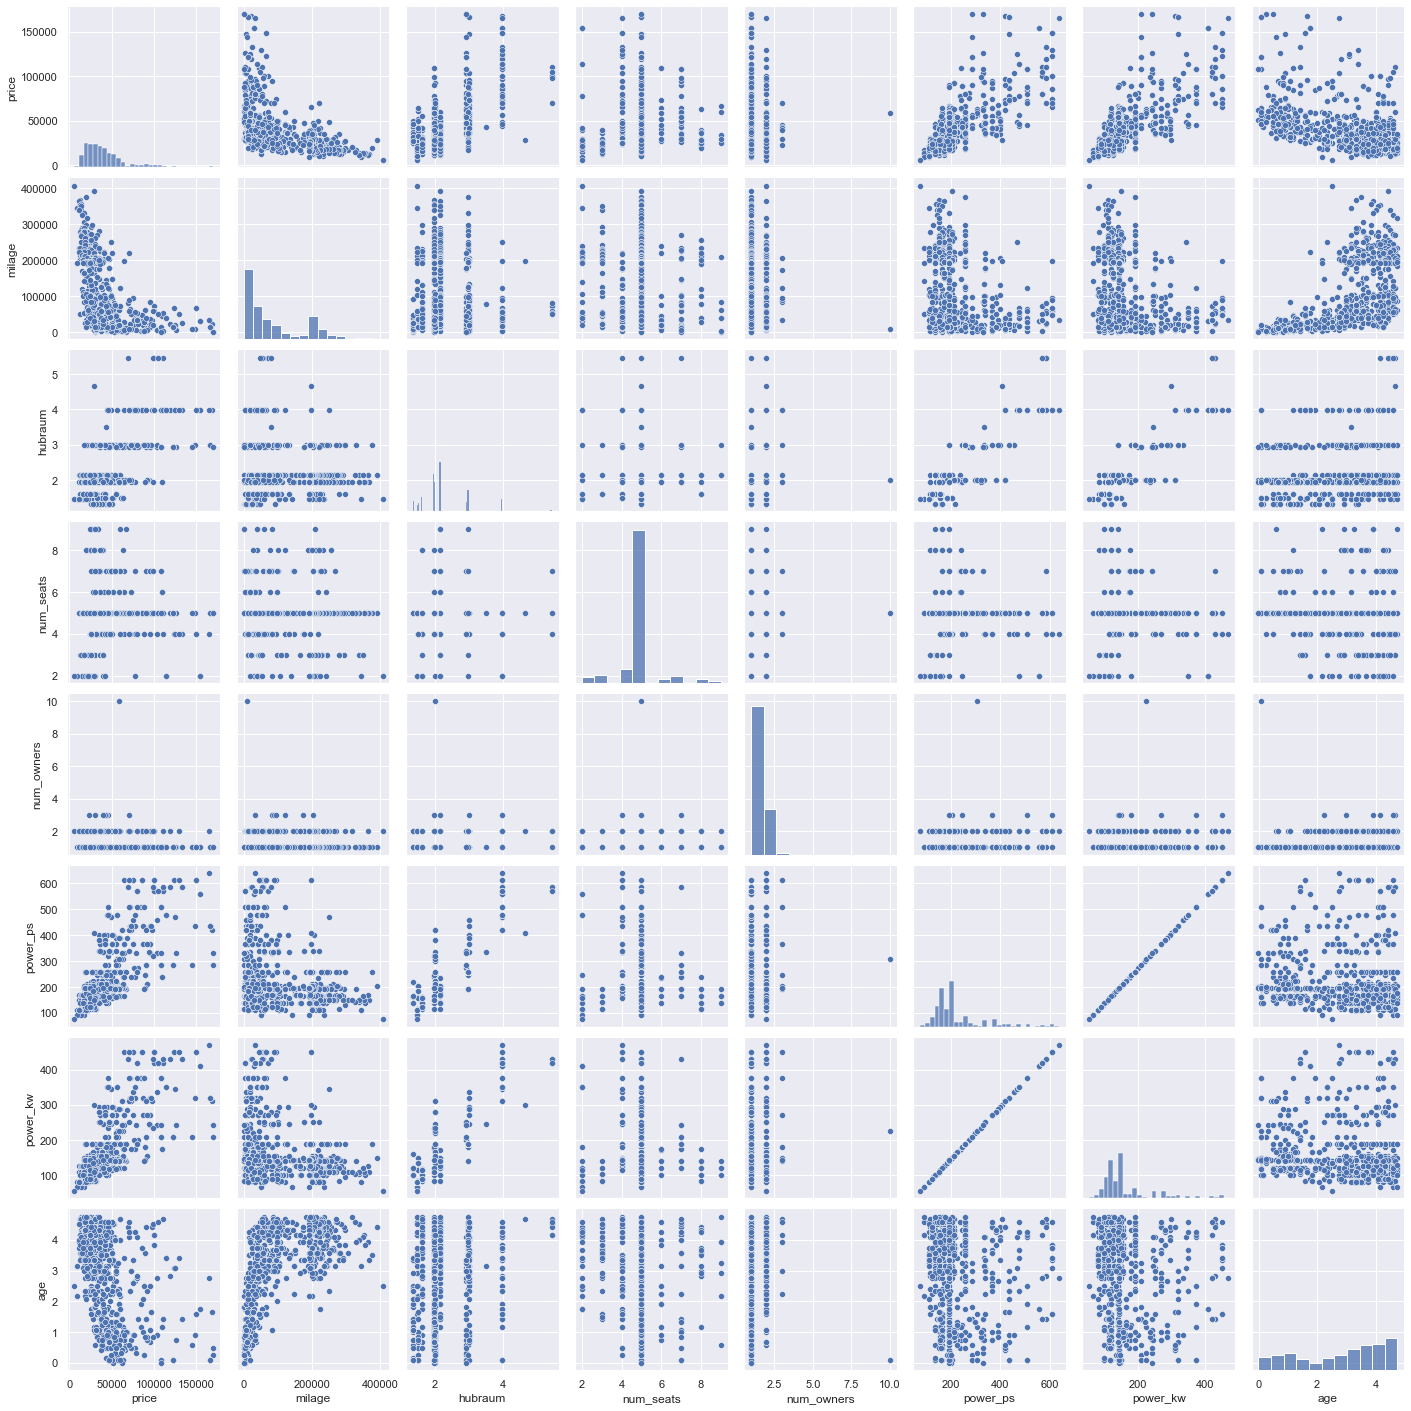

In [9]:
sns.pairplot(df);

Abhängige Variable ist: price

**Erste Erkenntnisse:**
- Zwischen price und power_ps besteht eine positive Beziehung
- Zwischen price und power_kw besteht eine positive Beziehung
- Da power_ps und power_kw den Leistungswert des Fahrzeuges bestimmen, korrelieren diese sehr stark miteinander. So sollte später beim Modelbuilding nur einer der Variablen berücksichtigt werden, das sonst unter den unabhängigen Variablen eine Multikollinearität besteht.
- Zwischen price und Hubraum besteht eine positive Beziehung.
- Zwischen Hubraum und power_ps,power_kw besteht ebenfalls eine positive Beziehung.

# Daten Exploration

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carname         900 non-null    object 
 1   price           900 non-null    float64
 2   milage          900 non-null    float64
 3   hubraum         900 non-null    float64
 4   fuel_type       900 non-null    object 
 5   transmission    900 non-null    object 
 6   num_seats       900 non-null    int64  
 7   num_doors       900 non-null    object 
 8   emission_class  900 non-null    object 
 9   car_type        900 non-null    object 
 10  num_owners      900 non-null    int64  
 11  Model           900 non-null    object 
 12  power_ps        900 non-null    float64
 13  power_kw        900 non-null    float64
 14  age             900 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 105.6+ KB


- Insgesamt gibt es 13 unabhängige Variablen und eine abhänige Variable "price"
- MVs gibt es keine, da bereits beim data cleaning alle MVs beseitigt wurden
- Die Datentypen müssen angepasst werden für die Variablen mit dtype: object.

## Anpassung der Datentypen

In [14]:
df['carname'] = df['carname'].astype("category")
df['fuel_type'] = df['fuel_type'].astype("category")
df['transmission'] = df['transmission'].astype("category")
df['num_seats'] = df['num_seats'].astype("category")
df['num_doors'] = df['num_doors'].astype("category")
df['emission_class'] = df['emission_class'].astype("category")
df['car_type'] = df['car_type'].astype("category")
df['num_owners'] = df['num_owners'].astype("category")
df['Model'] = df['Model'].astype("category")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   carname         900 non-null    category
 1   price           900 non-null    float64 
 2   milage          900 non-null    float64 
 3   hubraum         900 non-null    float64 
 4   fuel_type       900 non-null    category
 5   transmission    900 non-null    category
 6   num_seats       900 non-null    category
 7   num_doors       900 non-null    category
 8   emission_class  900 non-null    category
 9   car_type        900 non-null    category
 10  num_owners      900 non-null    category
 11  Model           900 non-null    category
 12  power_ps        900 non-null    float64 
 13  power_kw        900 non-null    float64 
 14  age             900 non-null    float64 
dtypes: category(9), float64(6)
memory usage: 92.6 KB


## Deskriptive Statistiken

In [17]:
df.describe()

,price,milage,hubraum,power_ps,power_kw,age
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,43408.403333,87759.004444,2.226998,228.208889,167.902222,2.780556
std,27921.526152,88064.879424,0.693198,111.816226,82.223382,1.430579
min,5899.000000,10.000000,1.332000,75.000000,55.000000,-0.003333
25%,24990.000000,17236.500000,1.950000,163.000000,120.000000,1.413333
50%,35995.000000,49700.000000,1.991000,194.000000,143.000000,3.163333
75%,51900.000000,153202.250000,2.143000,258.000000,190.000000,4.080000
max,169950.000000,406900.000000,5.461000,639.000000,470.000000,4.746667


**Auffälligkeiten bei numerischen Features:**
- milage: Es gibt neuwertige Fahrzeuge in dem Datensatz mit einer Laufleistung von 10KM. Auf der anderen Seite gibt auch Fahrzeuge, mit denen sehr oft gefahren wurde. Um den Restwert zu ermitteln spielt die milage eine wichtige Rolle, da Fahrzeuge mit mehr Kilometer auf dem Tachometer anfälliger sind.
-  power_ps: Mit einem Median von 194PS sind die Fahrzeuge von Mercedes gut motorisiert.
- age: Bei der Berechnung von age im data cleaning ist vermutlich für eine oder mehrere Instanzen ein Fehler passiert. Dieser Fehler mit -0.003333 muss genauer betrachtet werden -> Erste Identifikation von Noise

In [19]:
df.describe(include=['category'])

,carname,fuel_type,transmission,num_seats,num_doors,emission_class,car_type,num_owners,Model
count,900,900,900,900,900,900,900,900,900
unique,900,3,2,8,2,4,8,4,25
top,Mercedes-Benz 211 CDI Sprinter 906.613,Diesel,Automatik,5,4/5,Euro6,kombi,1,C-Klasse
freq,1,522,779,701,817,548,267,682,163


**Auffälligkeiten bei kategorischen Features:**
Ein großteil der Fahrzeuge haben folgende Eigenschaften:
- Der Kraftstofftyp ist Diesel
- Automatikgetriebe
- Fünfsitzer
- 4/5 Türer
- Haben die Emissionsklasse 6
- Kombifahrzeug
- als Model die C-Klasse
- 1 Vorbesitzer

### Überprüfung des Fehlers bei age -0.003333

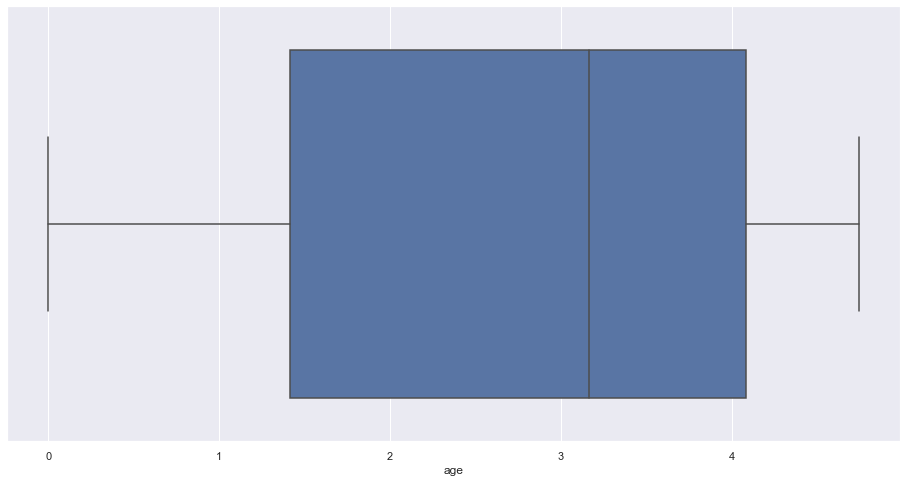

In [22]:
sns.boxplot(data=df, x="age");

In [26]:
df = df[df['age'] > 0]

In [27]:
df.age.min()

0.0799999999999272

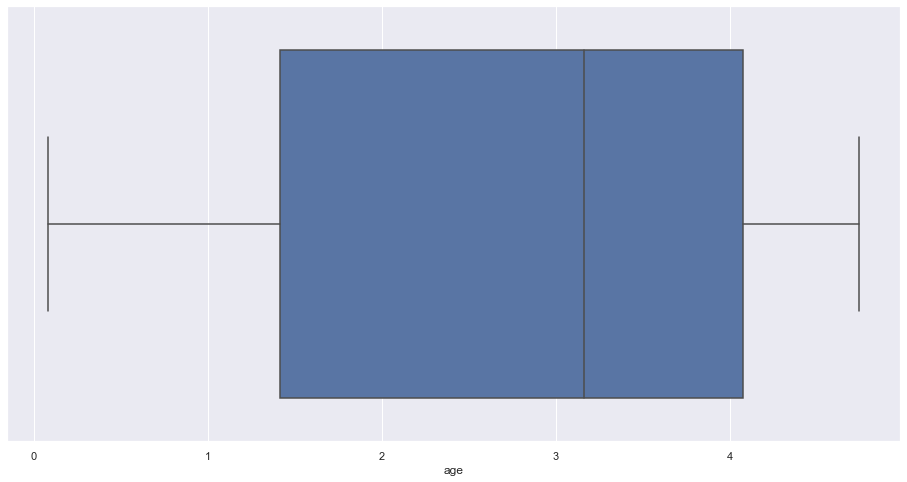

In [28]:
#Man kann erkennen, dass der Fehler nun beseitigt ist.
sns.boxplot(data=df, x="age");

### Verteilung der Features

<ipython-input-41-446d79012efc>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax, bins = 20);


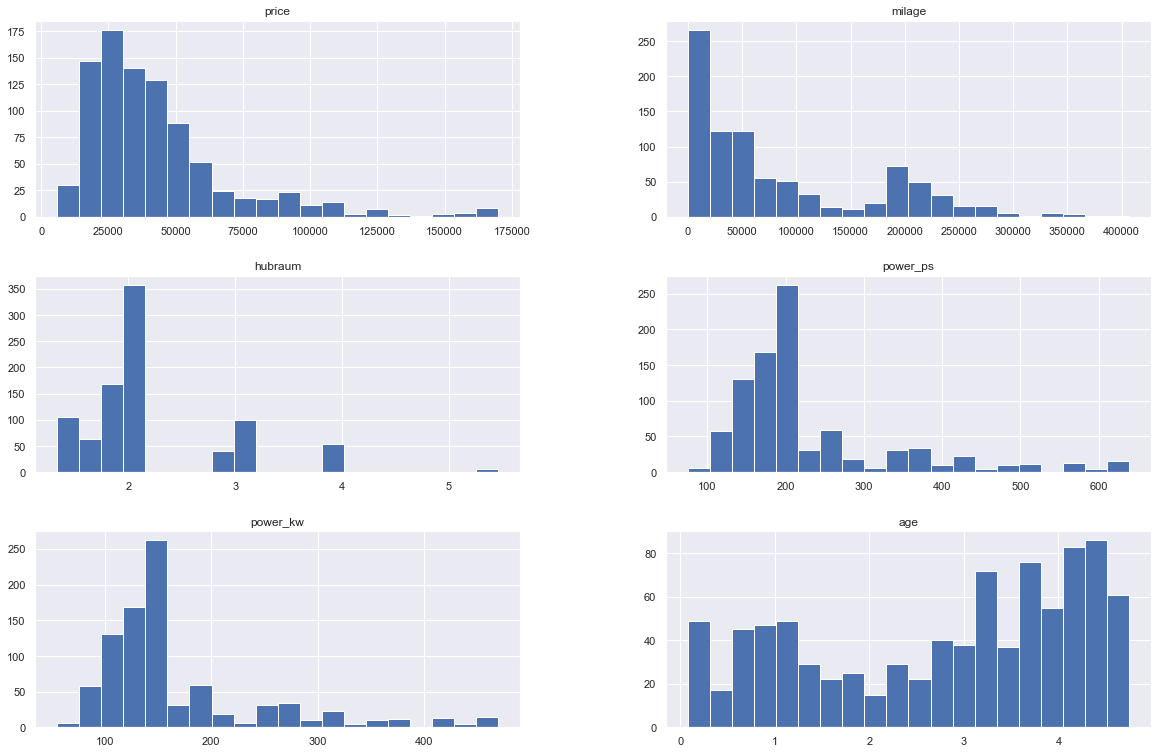

In [41]:
fig = plt.figure(figsize = (20,13))
ax = fig.gca()
df.hist(ax = ax, bins = 20);

Betrachtet man die Verteilungen der einzelnen Features, so zeigt sich, dass bei allen numerischen Features keine Normalverteilung vorliegt.
Damit die Lineare Regression eine besser Performance erzielt, könnte man die numerischen Features durch eine BoxCox-Transformation in eine Normalverteilung bringen.

In [55]:
df_cat = df.select_dtypes(include=['category']).columns.tolist()

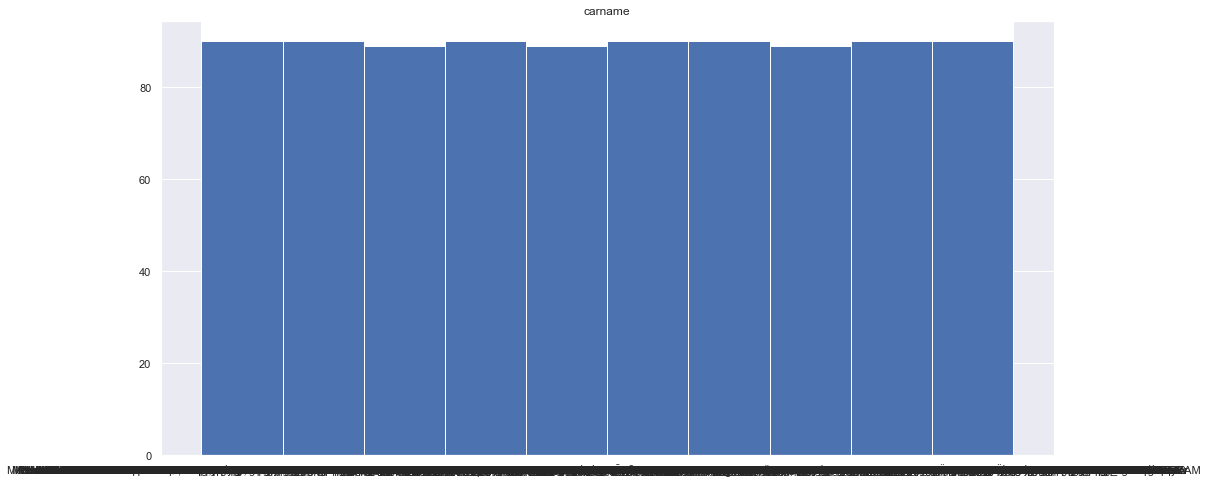

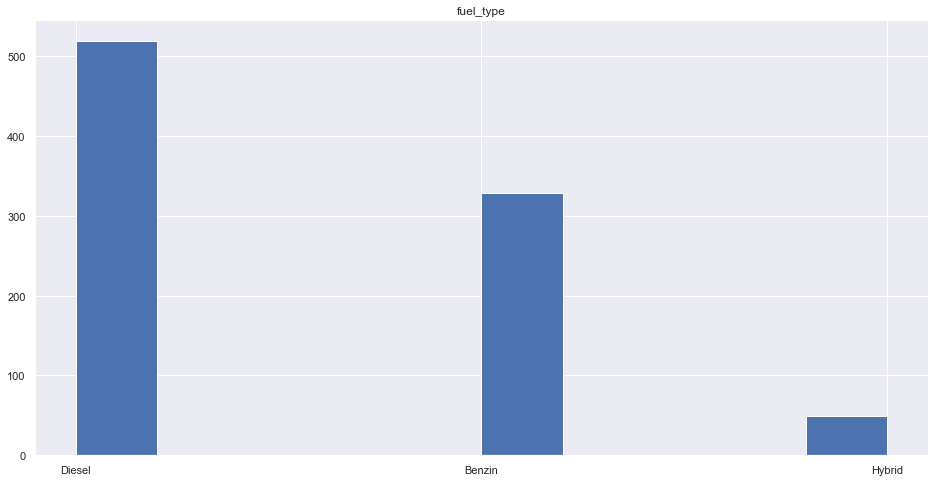

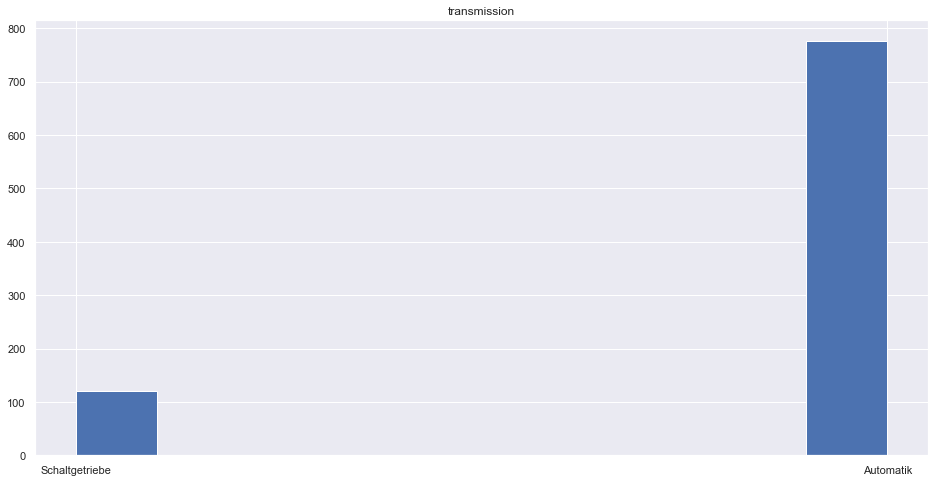

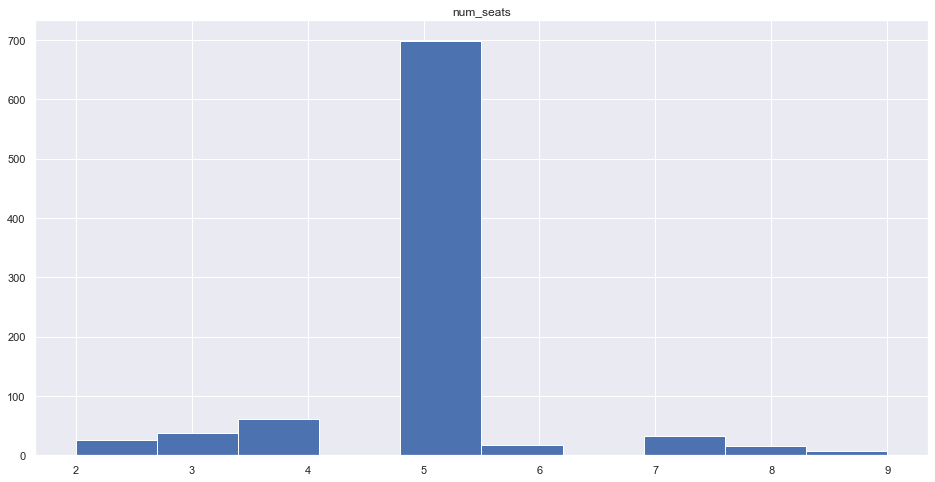

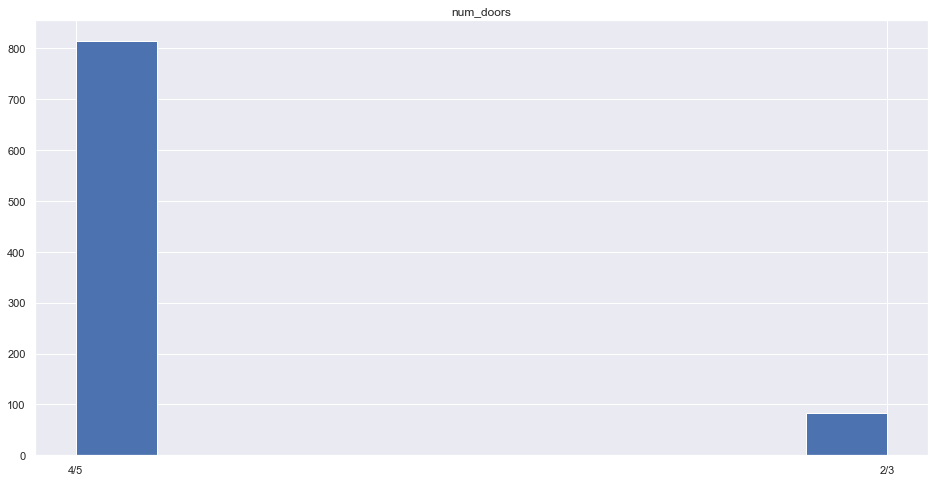

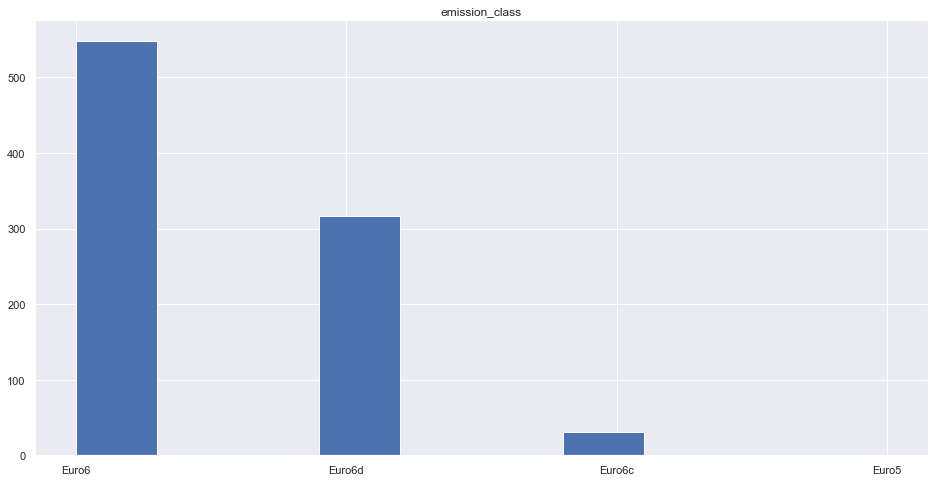

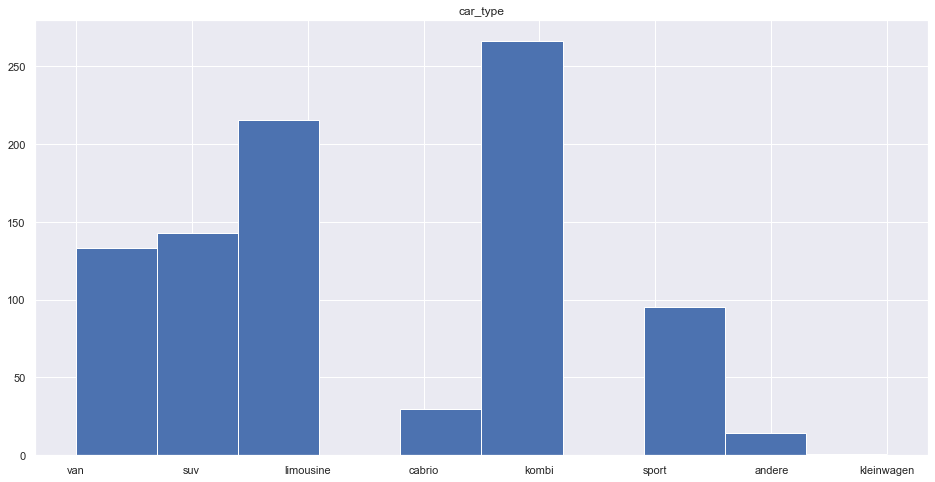

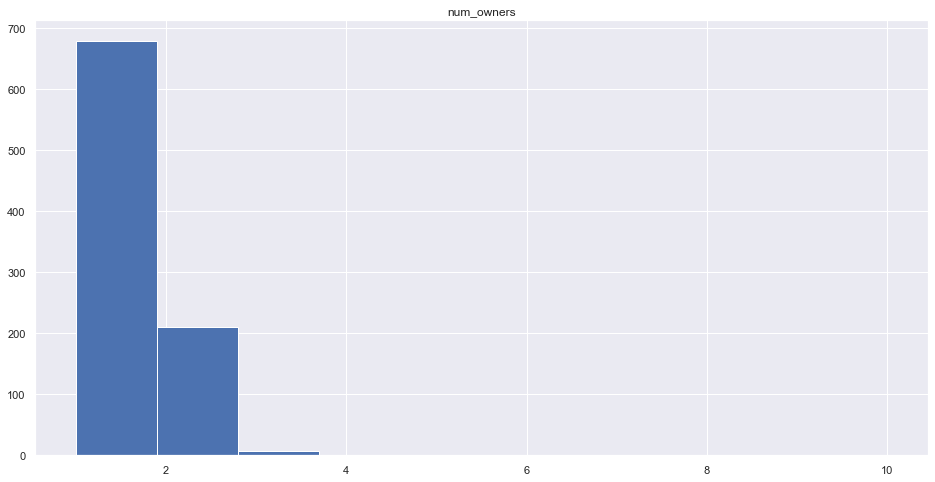

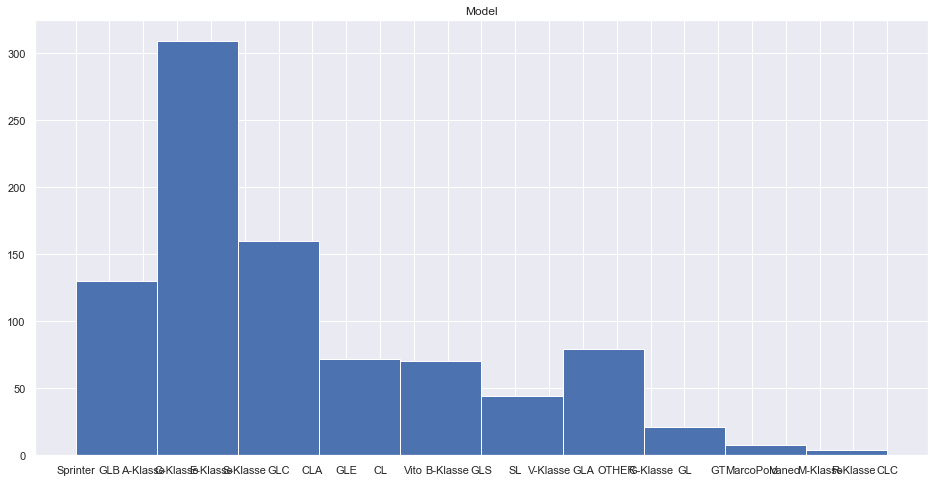

In [62]:
for col in df_cat:
    plt.title(col)
    plt.hist(df[col])
    plt.show()

### Ausreißer

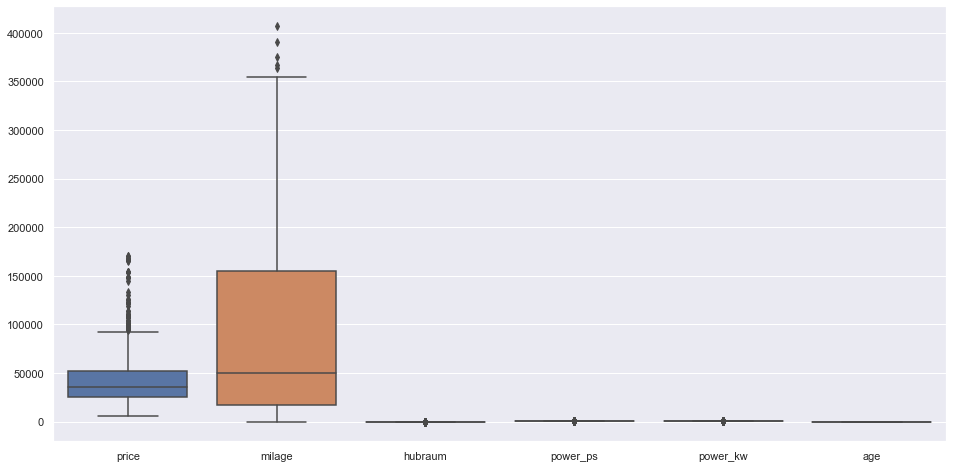

In [83]:
sns.boxplot(data=df);

**Auffälligkeiten:**
- Bei price und milage gibt es Ausreißer, die näher betrachtet werden sollten.
- Des Weiteren zeigen die Boxplots von price und milage, dass die Daten rechtsschief vorliegen. -> mehr bezahlbare Fahrzeuge & mehr Fahrzeuge deren Laufleistung nicht so hoch ist.
- Durch den hohen Wertebereich von price und milage, müssen die anderen Features einzeln betrachtet werden.

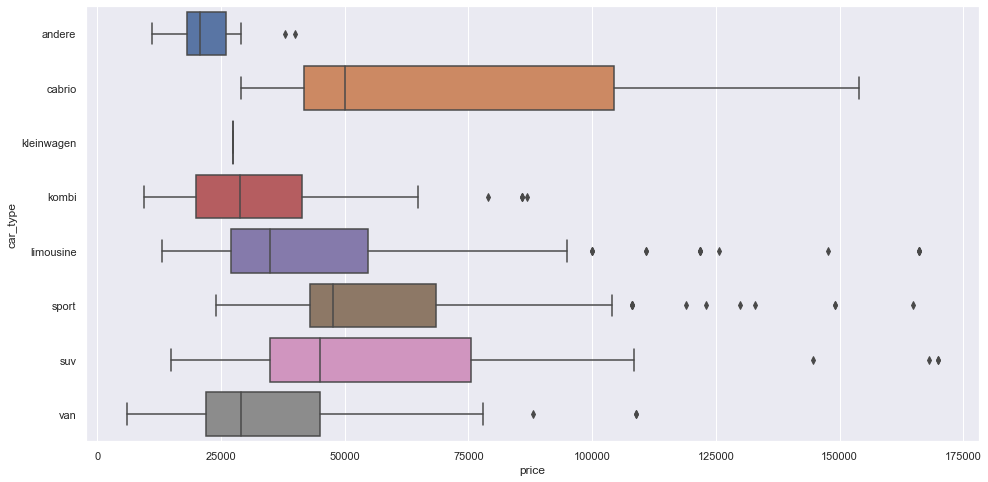

In [153]:
sns.boxplot(data=df, x='price', y='car_type');

- In dieser Grafik kann man feststellen, dass die Ausreißerwerte vor allem durch die Fahrzeugkategorien Limousine und Sport kommen.

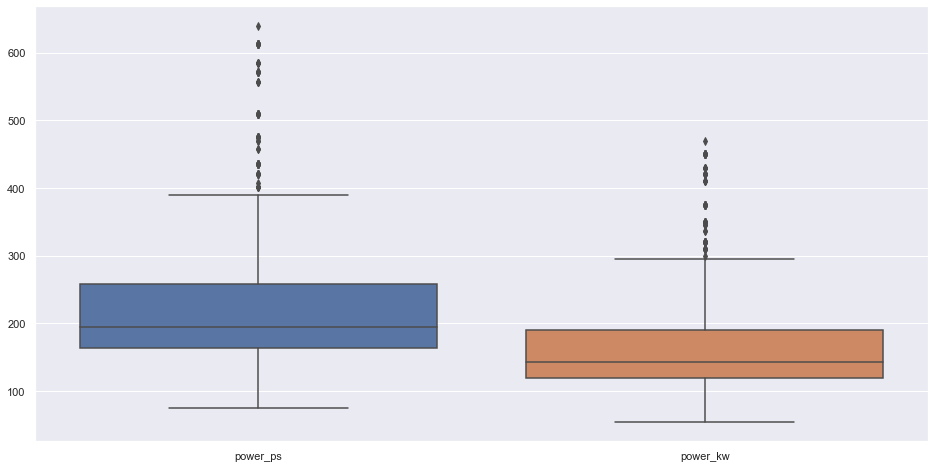

In [93]:
df_power = df[['power_ps', 'power_kw']]
sns.boxplot(data=df_power);

- Auch bei power_ps & und power_kw gibt es mehrere Ausreißerwerte

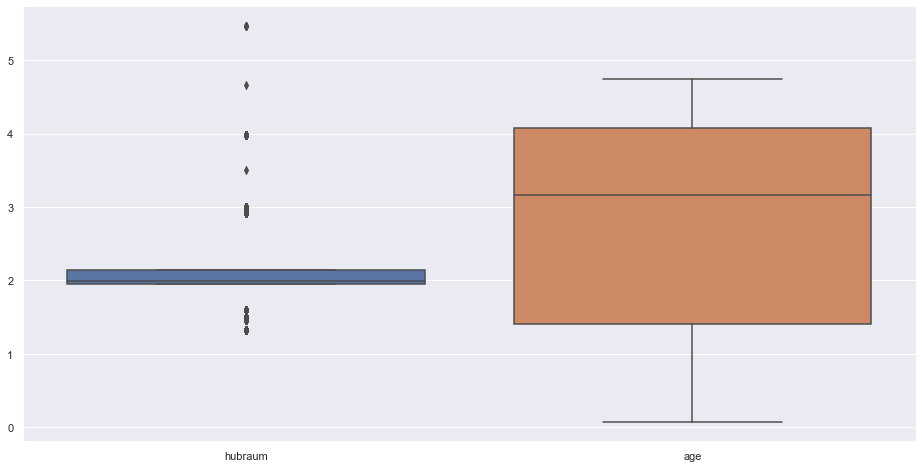

In [94]:
df_new = df[['hubraum', 'age']]
sns.boxplot(data=df_new);

- Bei hubraum gibt es ebenfalls mehrere Ausreißerwerte

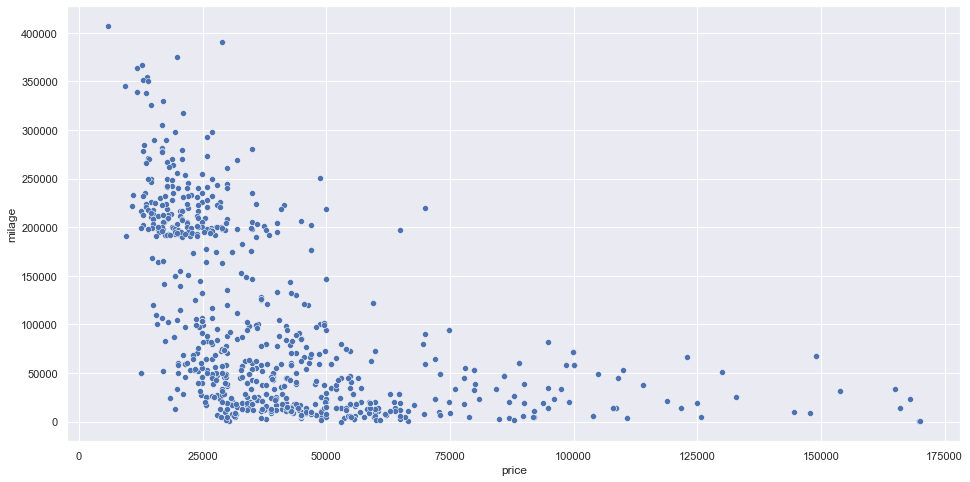

In [97]:
sns.scatterplot(x='price', y='milage', data=df);

### Überprüfung mit Influence plots

In [157]:
df_newindex = df.set_index('car_type')

In [158]:
#Erstellung eines linearen Modells mit numerischen Features, da die kategorischen Features noch onehot-encoded werden müssen
lm = ols("price ~ hubraum + milage + power_ps + age", data=df_newindex).fit()

In [159]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     574.6
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          4.63e-245
Time:                        12:55:08   Log-Likelihood:                -9882.0
No. Observations:                 897   AIC:                         1.977e+04
Df Residuals:                     892   BIC:                         1.980e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.868e+04   1884.865      9.912      0.0

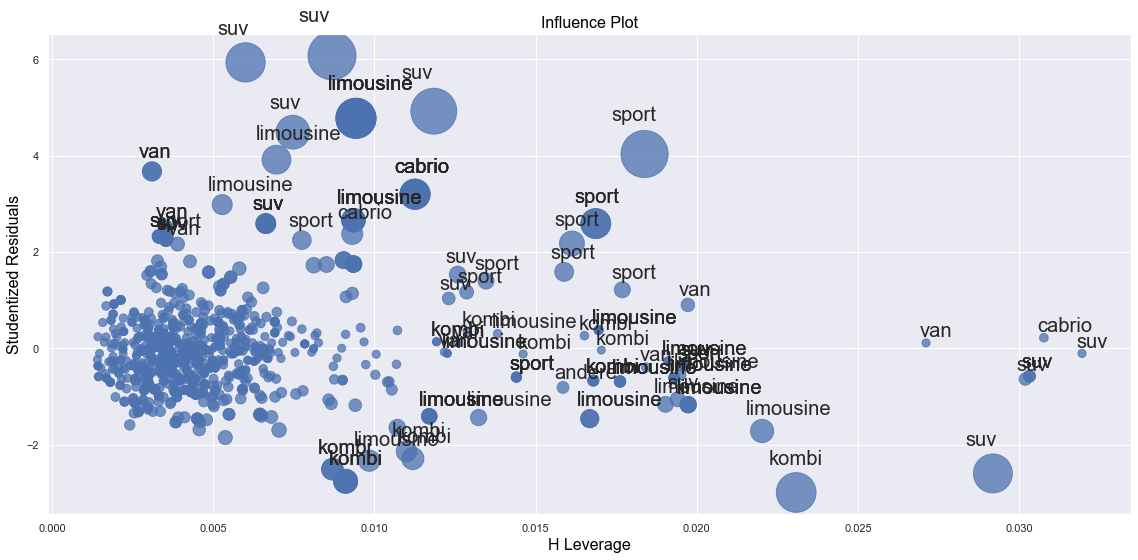

In [160]:
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

- wie man bereits in den Boxplots sehen konnte, haben die Fahrzeugkategorien Sport & Limousine viele Ausreißerwerte. In dem Influencespot kann man ebenfalls erkennen, dass diese Fahrzeugkategorien + Sport + Cabrio einen stärkeren Einfluss haben.

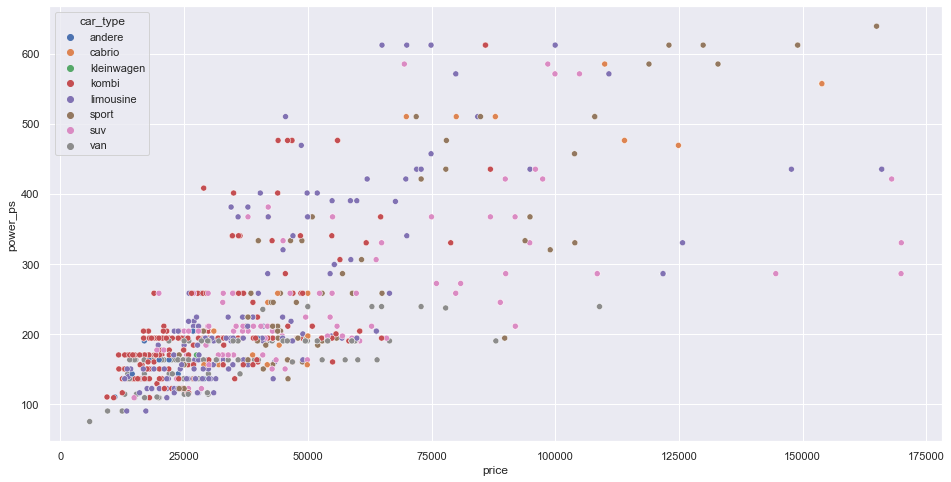

In [179]:
sns.scatterplot(x='price', y='power_ps', data=df, hue='car_type');

In der Grafik kann man erkennen, dass die Fahrzeugkategorien Sport, Limousine, SUV und Cabrio zu den teuren Fahrahzeugkategorien gehören. Da diese eine sehr große Streuung haben und einen großen Einfluss auf die Perfomance des Modells haben, werde ich diese Ausreißerwerte entfernen.

#### Entfernung der Ausreißerwerte

In [184]:
df_without_outlier = df[df['price'] < 75000]

In [185]:
x = len(df) - len(df_without_outlier)
x

98

Es wurden ungesamt 98 ausreißer Fahrzeuge entfernt.

In [207]:
lm2 = ols("price ~ hubraum + milage + power_ps + age", data=df_without_outlier).fit()

In [208]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     528.3
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          4.96e-222
Time:                        14:03:06   Log-Likelihood:                -8281.2
No. Observations:                 799   AIC:                         1.657e+04
Df Residuals:                     794   BIC:                         1.660e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.796e+04   1170.740     23.881      0.0

**Betrachtet man den R-squared, den Adj. R-squared und die F-Statisitic kann man deutlich erkennen, dass durch die Entfernung der Ausreißer, dass das zweite Modell im Verlgeich zum ersten Modell besser performt.**

### Partial Regression Plot

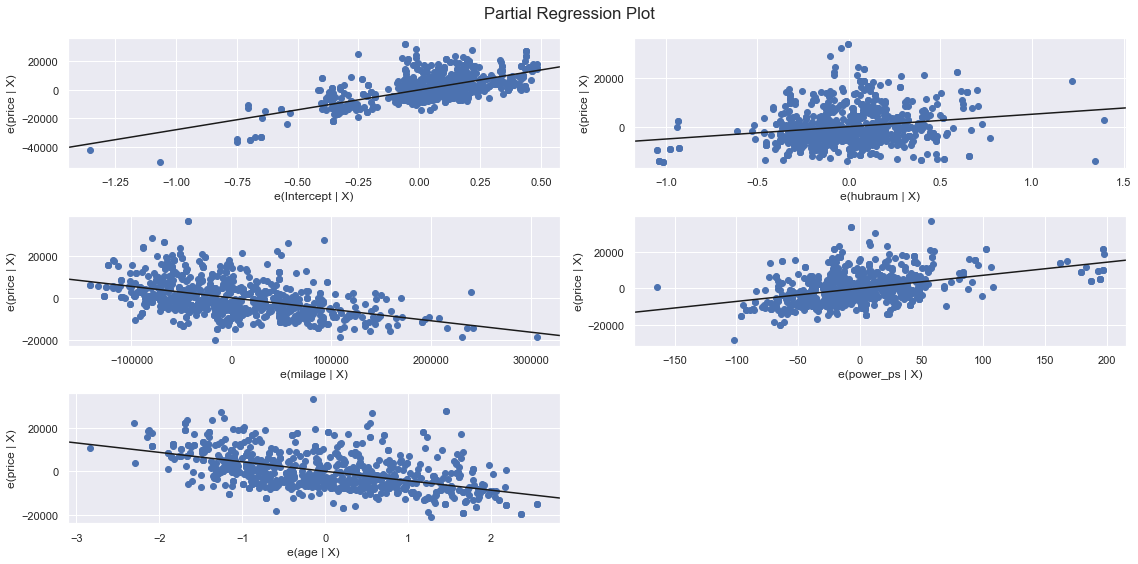

In [209]:
fig = sm.graphics.plot_partregress_grid(lm2)
fig.tight_layout(pad=1.0)

- Man kann deutlich erkennen, dass die PS-Anzahl und die Hubraumgröße einen positiven Einfluss auf den Preis haben.
- Und bei milage und age kann man erkennen, dass diese zwei Feautures einen negtiven EInfluss auf den Preis haben.

### Residuals vs fitted plot

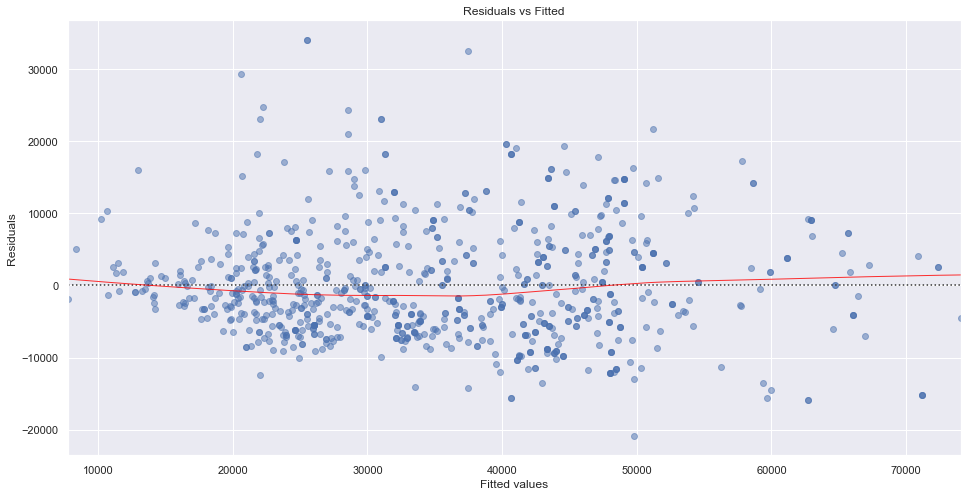

In [211]:
# fitted values
model_fitted_y = lm2.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='price', data=df_without_outlier, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

- Aus dem Residuals vs fitted Plot kann man erkennen, dass der Fit sehr nah bei der gepunkteten Linie liegt. Das ist ein Anzeichen dafür, dass eine lineare Beziehung vorliegt.
- Des Weiteren kann man erkennen, das die Residuen entlang der X-Achse abnehmen, dies spricht dafür, dass eine Heteroskedastizität vorliegt. Um diese Annahme zu prüfen werde ich im nächsten Schritt eine Breusch-Pagan Lagrange Multiplier test druchführen.

### Breusch-Pagan Lagrange Multiplier test

In [212]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(lm2.resid, lm2.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 20.638488470598723),
 ('p-value', 0.0003734449594829968),
 ('f-value', 5.263286918393706),
 ('f p-value', 0.00034614523646114696)]

Der Test zeigt, dass die Annahme richtg war, da beide p-Werte unter 0.05 liegen -> Somit liegt eine Heteroskedastizität vor.

### Korrelation / Multikollineraität

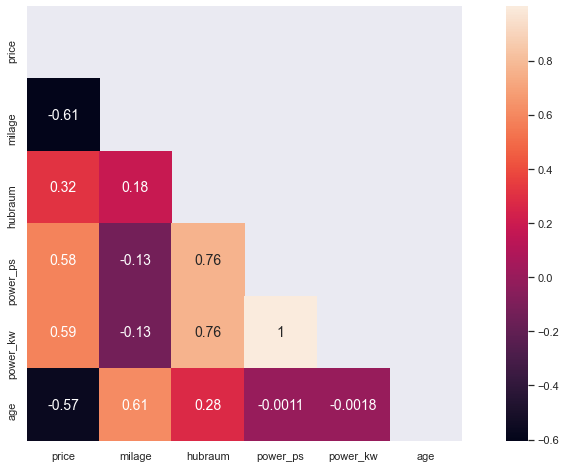

In [222]:
corr = df_without_outlier.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix, annot = True, square= True);

#### Korrelation der Features mit dem Label

schwach positive Korrelation: 
- hubraum: Zwischen Hubraum und price besteht **positive Beziehung**

mittelstarke positive/negative Korrelation:
- power_kw: Zwischen power_kw und price besteht **positive Beziehung**
- power_ps: Zwischen power_ps und price besteht **positive Beziehung**
- milage: Zwischen milage und price besteht **negative Beziehung**
- age: Zwischen age und price besteht **negative Beziehung**

### Multikollinearität

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_without_outlier.drop(['carname', 'fuel_type', 'transmission',
       'num_seats', 'num_doors', 'emission_class', 'car_type', 'num_owners',
       'Model', 'price'],axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

    feature            VIF
0    milage       3.655823
1   hubraum      34.235925
2  power_ps  647965.308676
3  power_kw  649056.022076
4       age       8.974137


An dieser kann man deutlich erkennen, wie man schon am Anfang vermutet hat, dass power_ps und power_kw stark miteinander korrelieren. So werde ich power_kw entfernen und den VIF nochmals berechnen

In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_without_outlier.drop(['carname', 'fuel_type', 'transmission',
       'num_seats', 'num_doors', 'emission_class', 'car_type', 'num_owners',
       'Model','price', 'power_kw'],axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

    feature        VIF
0    milage   3.651328
1   hubraum  33.019454
2  power_ps  20.767413
3       age   8.812668


Nachdem ich power_ps entfernt habe, hat sich wie erwartet auch der VIF von power_ps reduziert. Dennoch liegt bei manchen Feature der VIF über 10. So werde ich bei der Pipelineerstellung darauf achten, wie sich die Performance des Modells verschlechter/verbessert, wenn man auch Hubraum als unabhängige Variable entfernt.

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_without_outlier.drop(['carname', 'fuel_type', 'transmission',
       'num_seats', 'num_doors', 'emission_class', 'car_type', 'num_owners',
       'Model','price', 'power_kw', 'hubraum'],axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

    feature       VIF
0    milage  3.487899
1  power_ps  3.502665
2       age  6.909576


Enfernt man auch hubraum, so würde man die Multikollinearität im Datensatz beseitigen, da nun alle Features unter einem VIF-Wert von 10 liegen.

In [236]:
df_without_outlier = df_without_outlier.drop(['power_kw'],axis=1)

In [237]:
df_without_outlier.to_csv("/Users/cenkyagkan/books/mynewbook/content/mobile_clean_data_without_outlier"+ ".csv", index=False)

## Zusammenfassung der Ergebnisse:

### Outliers and high-leverage points
- Es wurden Ausreißer erkannt in price, power_ps, age, milage. Nachdem diese identifiziert wurden, konnte ich einen großen Teil der Ausreißer entfernen. Hierbei löschte ich die Fahrzeuge die mehr als 75000€ gekostet haben. Bei diesen Fahrzeugen handelte es sich um die Fahrzeugkategorien Sport, Limousine, SUV und Cabrio. Mit dem Influence plot konnte auch festgestellt werden, dass diese Fahrzeugkategorien einen großen Einfluss auf die Perfomance des Modells hatten. Dies ist als zweiter Grund zu sehen, weshalb diese Fahrzeuge entfernt wurden.
- Bei age handelte es sich um noise, da es kein negatives Alter gibt.

### Verteilung der Daten
- Es lag bei allen Features keine Normalverteilung vor.

### Lineare Beziehung und Heteroskedastizität
- Zwischen PS-Anzahl und price liegt eine lineare Beziehung vor.
- Zwischen hubraum und price liegt eine lineare Beziehung vor.
- Zwischen milage und price liegt eine lineare Beziehung vor.
- Zwischen age und price liegt eine lineare Beziehung vor.
- Aus dem Residuals vs fitted Plot wurde ersichtlich, dass eine Heteroskedastizität vorliegt.

### Korrelation

schwach positive Korrelation: 
- hubraum: Zwischen Hubraum und price besteht **positive Beziehung**

mittelstarke positive/negative Korrelation:
- power_kw: Zwischen power_kw und price besteht **positive Beziehung**
- power_ps: Zwischen power_ps und price besteht **positive Beziehung**
- milage: Zwischen milage und price besteht **negative Beziehung**
- age: Zwischen age und price besteht **negative Beziehung**

### Multikollinearität
- Unter den unabhängigen Variablen korrelierten power_ps mit power_kw. So wurde power_kw entfernt.
- Hubraum war ebenfalls verantwortlich für eine Multikollinearität. Da hubraum eine schwache positive Korrelation mit price besitzt, würde ich beim Modelbuilding in einer Pipeline Hububraum mitaufehmen, um zu testen wie es sich die auf die Performance des Modells auswirkt.
